# Phishing URL (Website) Prediction (Phase 2)

## Table of Contents :
* Introduction
* Goal Of the Project
* Data Story
* Data Preprocessing

#### Introducion

Phishing attacks have become a major cybersecurity threat, tricking users into revealing sensitive information by mimicking legitimate websites. Detecting phishing URLs is crucial in preventing fraud and enhancing online security. This project, Phishing URL (Website) Prediction, aims to analyze various website features—such as URL structure, security attributes, and content properties—to build a model that can accurately distinguish between legitimate and phishing websites. By leveraging machine learning and data-driven insights, the project seeks to develop an efficient and automated detection system to mitigate cyber risks.

#### Goal of the project

* Develop a machine learning-based model to accurately detect and predict phishing websites by analyzing URL and website features, enhancing online security.

#### Data Story

In the digital world, phishing attacks exploit unsuspecting users by creating deceptive websites that mimic legitimate ones. The challenge lies in distinguishing between real and fraudulent sites based on various characteristics.

Our dataset comprises multiple website features, including URL structure, security indicators (HTTPS, domain-title match), and content properties (number of scripts, external links, social network links). Through exploratory data analysis, we uncover key patterns—such as phishing websites often having more special characters in URLs, fewer security features, and certain predictable behaviors in their structure.

By leveraging machine learning, we aim to transform these insights into a predictive model that can effectively flag phishing URLs in real time, offering a proactive defense against cyber threats. This project bridges data-driven decision-making with cybersecurity to create a safer browsing environment.

## Libraries

In [166]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from kneed import KneeLocator
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier, plot_importance
from sklearn.pipeline import Pipeline
import joblib

#### Dataset loading

In [168]:
df= pd.read_csv("Phishing_dataset.csv")

df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


#### Data Preprocessing

In [170]:
df.shape

(235795, 56)

In [171]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [172]:
df.dtypes

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [173]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [174]:
df.duplicated().sum()

0

In [175]:
# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
for col in categorical_cols:
    print(col)

Categorical Columns:
FILENAME
URL
Domain
TLD
Title


#### Drop columns (eye ball check)

In [177]:
df= df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title'])

* FILENAME:doesn't contribute meaningful patterns for phishing detection.
* URL: The raw URL string is often very high-dimensional and unstructured.
* Domain: Domains are also often unique or have high cardinality.
* Title: The webpage title is not always available, and even when it is, it might not be directly useful without NLP processing.
* Retained Column: TLD (Top-Level Domain):TLDs like .com, .xyz, .ru, etc., can be useful indicators of phishing, as certain TLDs are more commonly used in malicious websites.

In [179]:
df.shape

(235795, 52)

In [180]:
# Enumerate the values in the "TLD" column
df['TLD'], tld_enum = pd.factorize(df['TLD'])

# Print the enumerated values
print("Enumerated values for column 'TLD':")
print(df['TLD'])

# Print the unique values corresponding to the enumerated values
print("\nUnique values corresponding to the enumerated values:")
print(tld_enum)

Enumerated values for column 'TLD':
0           0
1           1
2           2
3           0
4           3
         ... 
235790      0
235791      2
235792    104
235793     28
235794      0
Name: TLD, Length: 235795, dtype: int64

Unique values corresponding to the enumerated values:
Index(['com', 'de', 'uk', 'org', 'in', 'ie', 'hu', 'ru', 'gq', 'es',
       ...
       '166', 'ist', 'shoes', '14', 'ntt', '151', 'madrid', '46', 'film',
       'ne'],
      dtype='object', length=695)


In [181]:
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,0,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,1,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,2,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,0,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,3,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  int64  
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

In [183]:
# seperating target and feature
X = df.drop(columns=['label']) 
y = df['label']

In [184]:
for column in df.columns:
    # Get unique values and their counts for the column
    unique_values = df[column].value_counts()

    # Print column name
    print(f"\nUnique values for column '{column}':")

    # Print the unique values table
    print(unique_values)


Unique values for column 'URLLength':
URLLength
26     15561
25     14670
24     14515
27     14011
23     13829
       ...  
822        1
315        1
324        1
321        1
487        1
Name: count, Length: 482, dtype: int64

Unique values for column 'DomainLength':
DomainLength
18     16625
19     15876
20     15755
17     15419
16     15313
       ...  
102        1
105        1
96         1
95         1
97         1
Name: count, Length: 101, dtype: int64

Unique values for column 'IsDomainIP':
IsDomainIP
0    235157
1       638
Name: count, dtype: int64

Unique values for column 'TLD':
TLD
0      112554
3       18793
39       7097
12       6508
2        6395
        ...  
564         1
565         1
567         1
569         1
694         1
Name: count, Length: 695, dtype: int64

Unique values for column 'URLSimilarityIndex':
URLSimilarityIndex
100.000000    135636
66.720000        743
66.695385        498
36.681914        488
22.334010        369
               ...  
47.38991

#### Skewness and outliers

In [186]:
# skewness before outlier removal
X.skew().sort_values(ascending=True)

HasTitle                       -2.090195
IsHTTPS                        -1.370443
CharContinuationRate           -1.128591
URLCharProb                    -1.064291
URLSimilarityIndex             -0.989903
IsResponsive                   -0.514255
URLTitleMatchScore             -0.089085
LetterRatioInURL               -0.066358
DomainTitleMatchScore          -0.008735
HasCopyrightInfo                0.052921
TLDLegitimateProb               0.073090
HasSocialNet                    0.174379
HasDescription                  0.241000
HasSubmitButton                 0.347949
HasHiddenFields                 0.504096
HasFavicon                      0.575358
Robots                          1.056024
SpacialCharRatioInURL           1.184134
Pay                             1.236906
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfURLRedirect                 2.155960
Bank                            2.239229
DomainLength                    2.513397
HasPasswordField

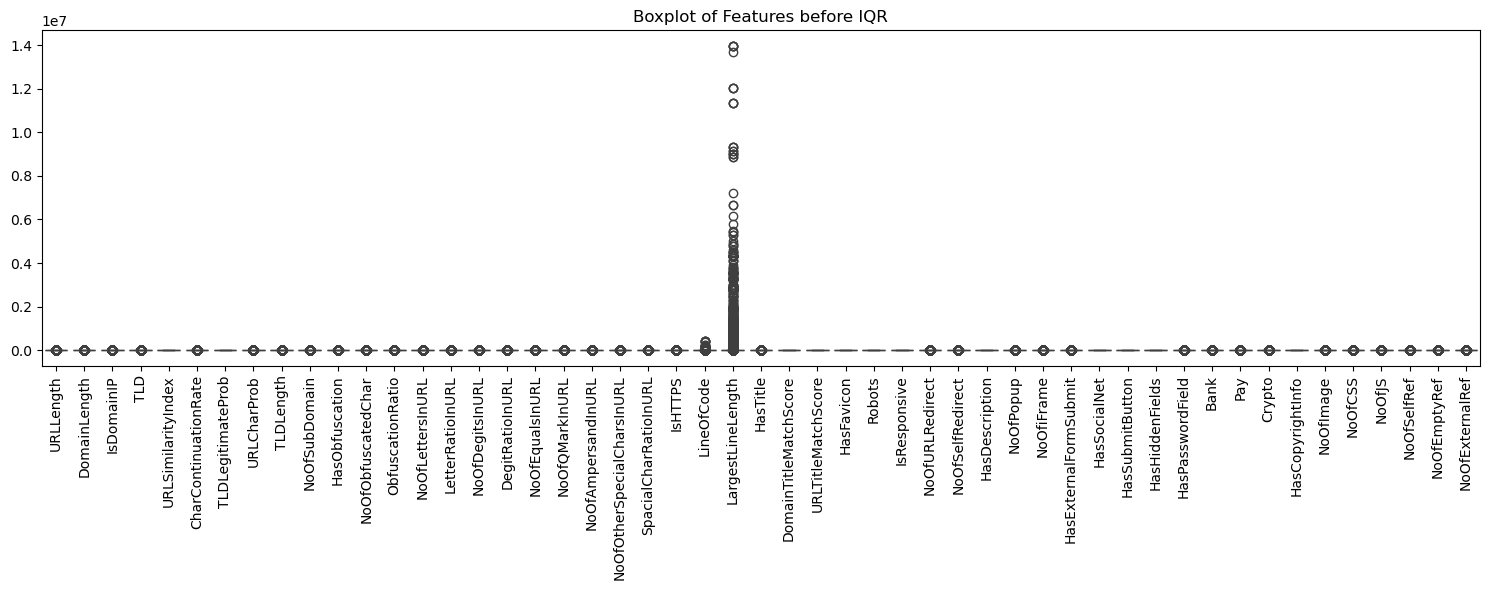

In [187]:
# Boxplot before outlier removal
plt.figure(figsize=(15, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Boxplot of Features before IQR")

plt.tight_layout()  
plt.show()

* Boxplot shows extreme outliers in many features (e.g., LargestLineLength, LineOfCode, NoOfLinks, etc.), indicating high skewness.

In [189]:
df_feature = X.copy()

In [190]:
# #IQR method for outlier removal
def remove_outliers(df_feature,columns):
  data_filtered=df_feature.copy()

  for column in columns:
     Q1 = df_feature[column].quantile(0.25)
     Q3 = df_feature[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered

In [191]:
new_data=remove_outliers(df_feature,[
    'LineOfCode', 'LargestLineLength', 'URLLength', 'DomainLength',
    'NoOfLettersInURL', 'NoOfDegitsInURL', 'ObfuscationRatio',
    'NoOfObfuscatedChar', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
    'NoOfImage', 'NoOfiFrame', 'NoOfEmptyRef',
    'NoOfExternalRef', 'NoOfSelfRef'
])

In [192]:
new_data.shape

(100557, 51)

In [193]:
df_feature.shape

(235795, 51)

* targeting only specific outlier-heavy features because moving forward with all columns creating more data loss

In [195]:
new_data2 = remove_outliers(df_feature,[
    'LineOfCode',
    'LargestLineLength',
    'URLLength',
    'DomainLength'
])

In [196]:
new_data2.shape

(180469, 51)

* Large datasets can tolerate data loss:
  
Starting size: ~235K rows

After cleaning: ~180K rows

Data loss ≈ 23.5%, which is still acceptable for large datasets.

In [198]:
new_data2.skew().sort_values(ascending=True)

HasTitle                       -2.130450
URLCharProb                    -1.290758
CharContinuationRate           -1.196586
IsHTTPS                        -1.188811
URLSimilarityIndex             -1.045294
IsResponsive                   -0.528096
LetterRatioInURL               -0.325492
URLTitleMatchScore             -0.245265
DomainTitleMatchScore          -0.185116
HasCopyrightInfo                0.012978
TLDLegitimateProb               0.063153
HasSocialNet                    0.117375
HasDescription                  0.157803
HasSubmitButton                 0.429755
DomainLength                    0.495845
HasFavicon                      0.569369
HasHiddenFields                 0.624389
NoOfLettersInURL                0.778782
URLLength                       0.880323
Robots                          1.030975
LineOfCode                      1.204858
SpacialCharRatioInURL           1.311962
Pay                             1.490341
LargestLineLength               1.497579
NoOfSubDomain   

#### Power transformation

In [200]:


# Columns  identified as highly skewed
neg_skew_cols = [
    'HasTitle', 'URLCharProb', 'CharContinuationRate', 'IsHTTPS', 'URLSimilarityIndex'
]

pos_skew_cols = [
    'LineOfCode', 'LargestLineLength', 'NoOfSubDomain', 'TLDLength', 'Bank',
    'NoOfURLRedirect', 'HasPasswordField', 'NoOfJS', 'NoOfSelfRef', 'DegitRatioInURL',
    'NoOfExternalRef', 'NoOfCSS', 'NoOfDegitsInURL', 'TLD', 'NoOfImage', 'Crypto',
    'NoOfiFrame', 'NoOfQMarkInURL', 'NoOfEmptyRef', 'NoOfEqualsInURL', 'IsDomainIP',
    'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfPopup', 'NoOfAmpersandInURL','HasExternalFormSubmit','NoOfSelfRedirect','NoOfOtherSpecialCharsInURL'
]

yeo_cols = neg_skew_cols + pos_skew_cols

# Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
new_data2[yeo_cols] = pt.fit_transform(new_data2[yeo_cols])


In [201]:
new_data2.shape

(180469, 51)

In [202]:
new_data2.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,-0.025902,-0.952622,0.760682,0.732863,0.522907,0.441554,0.497737,-0.191398,...,3.015611,0,-0.120879,1,0.999859,1.462788,1.310432,1.129270,-0.654002,1.310555
1,23,16,-0.025902,-0.323823,0.760682,-1.397570,0.032650,-0.848950,-1.445066,-0.191398,...,-0.331608,0,-0.120879,1,1.227298,0.984024,0.428341,0.614634,-0.654002,1.589167
2,29,22,-0.025902,-0.015485,0.760682,-0.544769,0.028555,0.747224,-1.445066,1.595937,...,-0.331608,0,-0.120879,1,0.297040,0.006001,0.339727,0.648637,1.469733,-0.291007
5,30,23,-0.025902,0.180339,0.760682,0.732863,0.079963,0.268823,0.497737,-0.191398,...,-0.331608,0,-0.120879,1,1.016898,-0.390604,0.644919,0.979049,-0.654002,0.206963
6,25,18,-0.025902,-0.952622,0.760682,0.732863,0.522907,0.664302,0.497737,-0.191398,...,-0.331608,0,-0.120879,1,0.964261,0.454868,0.813044,0.670004,1.469733,0.304505


In [203]:
new_data.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,0,100.000000,1.000000,0.522907,0.061933,3,1,...,1,0,0,1,34,20,28,119,0,124
2,29,22,0,2,100.000000,0.866667,0.028555,0.064129,2,2,...,0,0,0,1,10,2,7,42,2,5
5,30,23,0,3,100.000000,1.000000,0.079963,0.060614,3,1,...,0,0,0,1,35,1,11,86,0,14
7,25,18,0,0,100.000000,1.000000,0.522907,0.060486,3,1,...,0,0,0,1,24,2,22,36,0,15
11,22,16,0,0,82.644628,1.000000,0.522907,0.067418,3,1,...,0,0,0,0,0,0,0,0,0,1


In [204]:
new_data2.skew().sort_values(ascending=True)

HasTitle                      -2.130450
IsHTTPS                       -1.188811
CharContinuationRate          -0.719804
URLSimilarityIndex            -0.672462
IsResponsive                  -0.528096
LetterRatioInURL              -0.325492
URLTitleMatchScore            -0.245265
LineOfCode                    -0.243031
DomainTitleMatchScore         -0.185116
LargestLineLength             -0.047106
TLDLength                     -0.009816
NoOfJS                        -0.001970
NoOfImage                      0.005376
NoOfSelfRef                    0.008547
HasCopyrightInfo               0.012978
URLCharProb                    0.018804
NoOfExternalRef                0.024516
NoOfSubDomain                  0.059187
TLDLegitimateProb              0.063153
HasSocialNet                   0.117375
NoOfCSS                        0.121687
HasDescription                 0.157803
TLD                            0.324110
HasSubmitButton                0.429755
DomainLength                   0.495845


In [205]:
log_transform_cols = [
    'SpacialCharRatioInURL',
    
    'NoOfDegitsInURL',
    'DegitRatioInURL',
    'NoOfURLRedirect',
    'Bank',
    'HasPasswordField',
    'NoOfPopup',
    'HasExternalFormSubmit',
    'NoOfSelfRedirect',
    'Crypto',
    'NoOfQMarkInURL',
    'NoOfEqualsInURL',
    'IsDomainIP',
    'NoOfAmpersandInURL',
    'NoOfObfuscatedChar',
    'ObfuscationRatio',
    'HasObfuscation'
]


# Apply log1p transformation to highly skewed positive-only columns
for col in log_transform_cols:
    new_data2[col] = np.log1p(new_data2[col])


In [206]:
new_data2.skew().sort_values(ascending=True)

HasTitle                      -2.130450
IsHTTPS                       -1.188811
CharContinuationRate          -0.719804
URLSimilarityIndex            -0.672462
IsResponsive                  -0.528096
LetterRatioInURL              -0.325492
URLTitleMatchScore            -0.245265
LineOfCode                    -0.243031
DomainTitleMatchScore         -0.185116
LargestLineLength             -0.047106
TLDLength                     -0.009816
NoOfJS                        -0.001970
NoOfImage                      0.005376
NoOfSelfRef                    0.008547
HasCopyrightInfo               0.012978
URLCharProb                    0.018804
NoOfExternalRef                0.024516
NoOfSubDomain                  0.059187
TLDLegitimateProb              0.063153
HasSocialNet                   0.117375
NoOfCSS                        0.121687
HasDescription                 0.157803
TLD                            0.324110
HasSubmitButton                0.429755
DomainLength                   0.495845


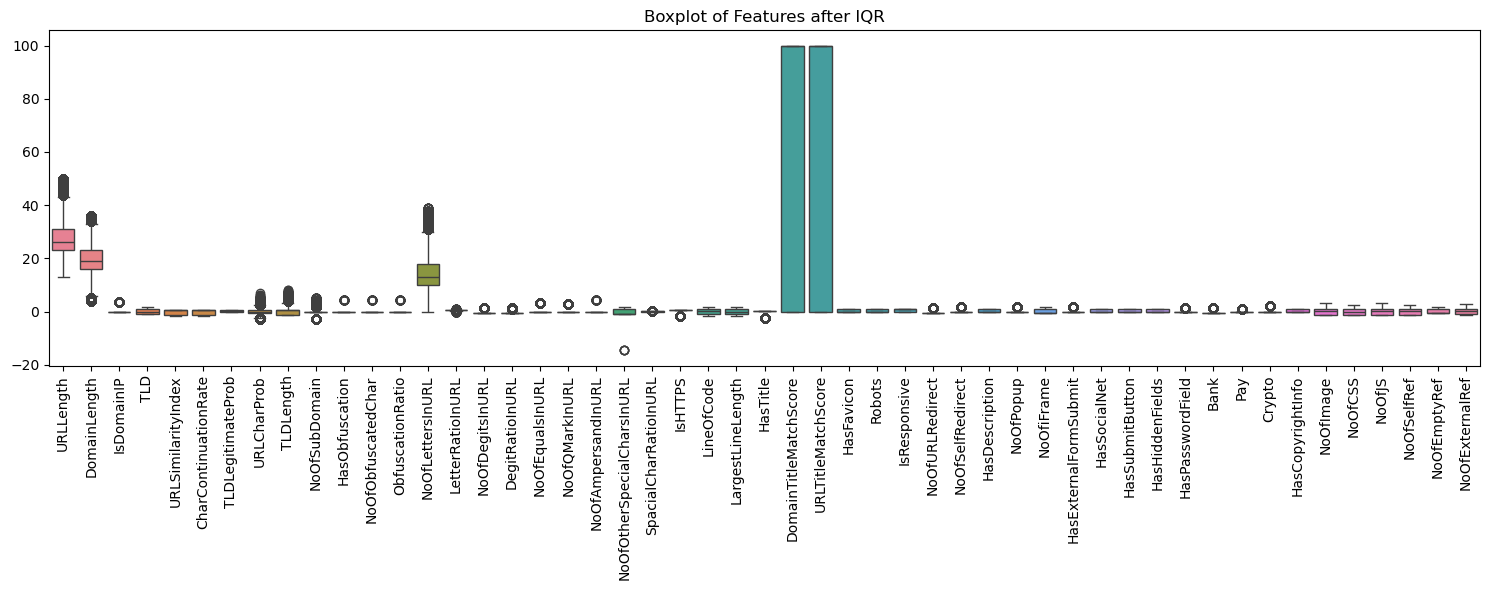

In [207]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=new_data2)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Boxplot of Features after IQR")

plt.tight_layout()  
plt.show()

* Leaving the Highly Skewed Data As Is:

Model Robustness, Preserving Important Patterns ,Avoiding Data Loss

##### Sample 

In [212]:
X = new_data2 
Y = y.loc[X.index]



# Sample 50,000 rows with correct class distribution
X_sample, _, y_sample, _ = train_test_split(
    X, Y, train_size=50000, stratify=Y, random_state=42
)


In [214]:
X_sample.shape

(50000, 51)

In [216]:
y_sample.shape

(50000,)

In [218]:
X_sample.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
154312,23,16,-0.026244,-0.952622,0.760682,0.732863,0.522907,-0.060031,0.497737,-0.191398,...,-0.40288,0,-0.128833,1,1.138176,-1.162370,0.705212,0.746848,-0.654002,0.039860
186903,27,20,-0.026244,-0.952622,0.760682,-1.556258,0.522907,-0.373662,0.497737,-0.191398,...,-0.40288,0,-0.128833,1,1.138176,1.490122,1.452503,0.962635,-0.654002,1.277128
125675,27,20,-0.026244,-0.015485,0.760682,-1.069674,0.028555,0.060858,-1.445066,1.595937,...,-0.40288,0,-0.128833,1,0.443923,1.699739,1.452503,1.288837,-0.654002,1.479634
161844,28,21,-0.026244,1.483914,0.760682,-1.653801,0.001354,-0.080447,-1.445066,1.595937,...,-0.40288,0,-0.128833,1,0.443923,0.454868,0.428341,0.827921,-0.654002,0.985129
163651,43,18,-0.026244,0.851677,-1.670715,-1.530273,0.012927,-0.773478,-1.445066,-0.191398,...,-0.40288,0,-0.128833,0,-1.176305,-1.162370,-1.219380,-1.143523,-0.654002,-1.303178


#### Feature Selection

In [221]:



# Combine X_sample and y_sample temporarily
df = pd.concat([X_sample, y_sample], axis=1)

threshold = 0.7
correlated_features = set()

# Run multiple iterations to recursively remove highly correlated features
for _ in range(4):
    corr_matrix = df.corr('pearson').abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    for column in upper_triangle.columns:
        if column != y_sample.name and any(upper_triangle[column] > threshold):
            correlated_features.add(column)

    # Drop identified correlated columns
    df = df.drop(columns=[col for col in correlated_features if col in df.columns])

# Separate cleaned X and y
X_sample_cleaned = df.drop(columns=[y_sample.name])
y_sample_cleaned = df[y_sample.name]

# Print removed features only once
print("Removed features:")
print(sorted(correlated_features))



Removed features:
['DegitRatioInURL', 'DomainLength', 'HasCopyrightInfo', 'HasSocialNet', 'LargestLineLength', 'LetterRatioInURL', 'LineOfCode', 'NoOfAmpersandInURL', 'NoOfCSS', 'NoOfExternalRef', 'NoOfImage', 'NoOfJS', 'NoOfLettersInURL', 'NoOfObfuscatedChar', 'NoOfOtherSpecialCharsInURL', 'NoOfQMarkInURL', 'NoOfSelfRef', 'ObfuscationRatio', 'SpacialCharRatioInURL', 'TLDLegitimateProb', 'URLTitleMatchScore']


In [223]:
X_sample_cleaned.shape

(50000, 30)

In [225]:
X_sample.shape

(50000, 51)

In [227]:
y_sample_cleaned.shape

(50000,)

## Feature scaling & model training and Evaluations

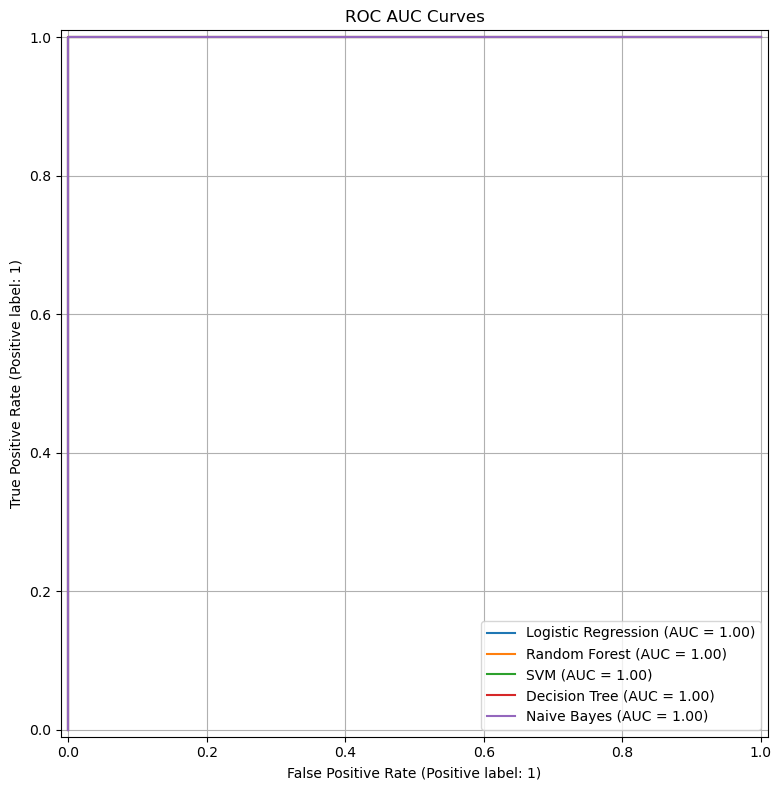

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.9999,0.999836,1.000000,0.999918,1.0
Random Forest,1.0000,1.000000,1.000000,1.000000,1.0
SVM,1.0000,1.000000,1.000000,1.000000,1.0
Decision Tree,1.0000,1.000000,1.000000,1.000000,1.0
Naive Bayes,0.9992,1.000000,0.998687,0.999343,1.0


In [230]:

# # Load the cleaned feature and target data
X = X_sample_cleaned
y = y_sample_cleaned

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Store evaluation results
results = {}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    }

# Plot ROC AUC curves
plt.figure(figsize=(15, 8))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name, ax=plt.gca())

plt.title("ROC AUC Curves")
plt.grid()
plt.tight_layout()
plt.show()

# Show results
pd.DataFrame(results).T.sort_values(by="ROC AUC", ascending=False)


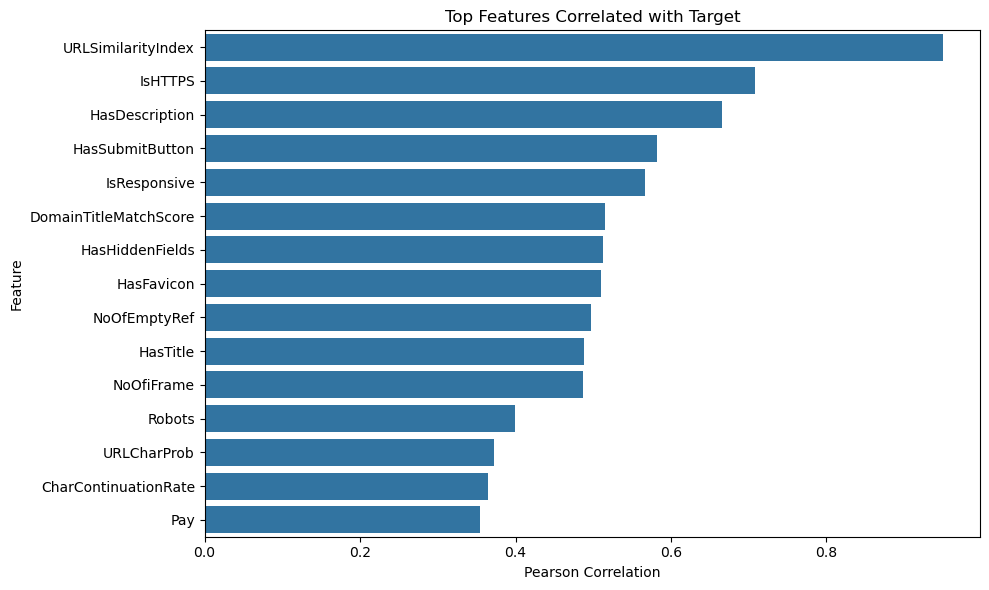

URLSimilarityIndex    0.950034
Name: target, dtype: float64


In [231]:


# Add the target column to feature dataframe temporarily
df_with_target = X_sample_cleaned.copy()
df_with_target['target'] = y_sample_cleaned

# Correlation with the target
correlations = df_with_target.corr()['target'].drop('target').sort_values(ascending=False)

# Plot top features highly correlated with target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values[:15], y=correlations.index[:15])
plt.title("Top Features Correlated with Target")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Print potential leakage signals
print(correlations[correlations > 0.95])


In [232]:


# Define model
model = RandomForestClassifier(random_state=42)

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using accuracy, precision, recall, F1


scorers = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': make_scorer(f1_score)
}

for metric, scorer in scorers.items():
    scores = cross_val_score(model, X_sample_cleaned, y_sample_cleaned, cv=skf, scoring=scorer)
    print(f"{metric.capitalize()} Score: {scores.mean():.4f} ± {scores.std():.4f}")


Accuracy Score: 0.9999 ± 0.0000
Precision Score: 0.9999 ± 0.0001
Recall Score: 1.0000 ± 0.0000
F1 Score: 1.0000 ± 0.0000


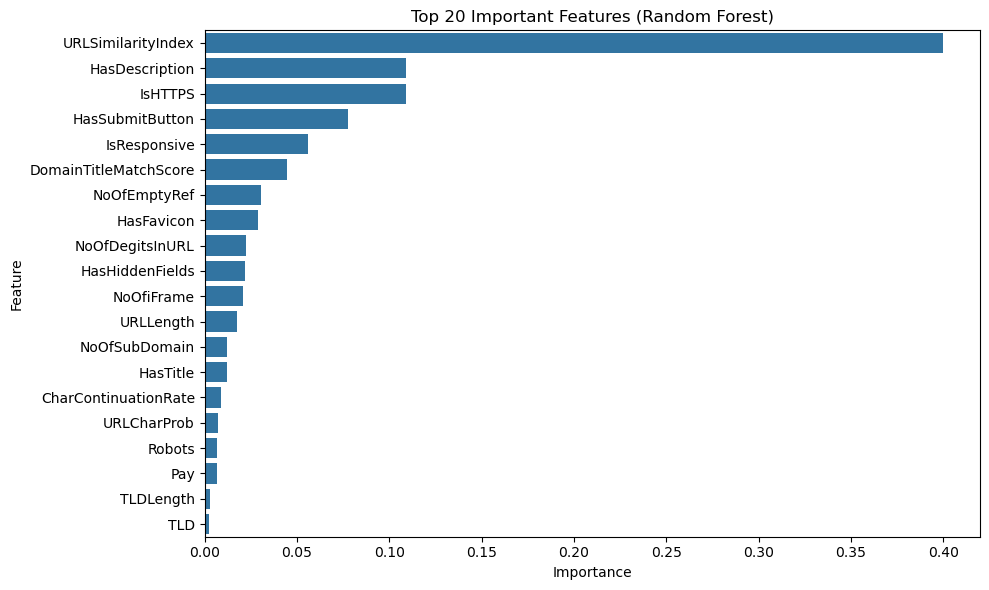

In [233]:
importances = model.fit(X_sample_cleaned, y_sample_cleaned).feature_importances_
features = X_sample_cleaned.columns

# Create DataFrame and plot
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(20))
plt.title("Top 20 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


C:\Users\jayak\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:50:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1000x800 with 0 Axes>

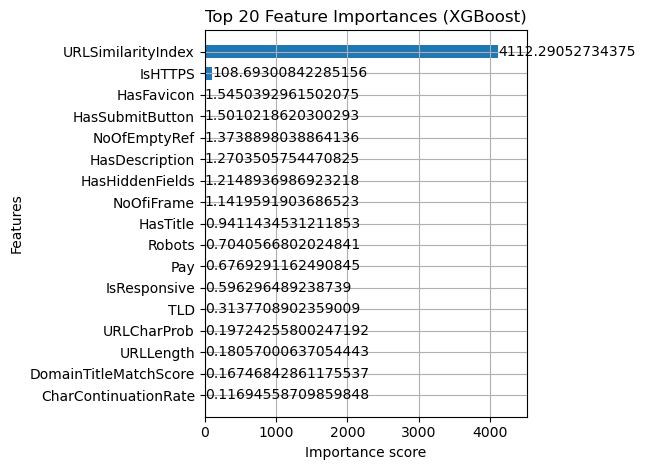

In [234]:


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_sample_cleaned, y_sample_cleaned)

# Plot importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20, importance_type='gain', height=0.6)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [235]:


# 1. Drop URLSimilarityIndex from features
X_no_leak = X_sample_cleaned.drop(columns=['URLSimilarityIndex'])

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_leak)

# 3. Set up models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# 4. Use Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Evaluate
from sklearn.model_selection import cross_validate

for name, model in models.items():
    scores = cross_validate(
        model, X_scaled, y_sample_cleaned,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        cv=skf, return_train_score=False
    )

    print(f"\n{name}")
    print(f"Accuracy Score: {np.mean(scores['test_accuracy']):.4f} ± {np.std(scores['test_accuracy']):.4f}")
    print(f"Precision Score: {np.mean(scores['test_precision']):.4f} ± {np.std(scores['test_precision']):.4f}")
    print(f"Recall Score: {np.mean(scores['test_recall']):.4f} ± {np.std(scores['test_recall']):.4f}")
    print(f"F1 Score: {np.mean(scores['test_f1']):.4f} ± {np.std(scores['test_f1']):.4f}")
    print(f"ROC AUC Score: {np.mean(scores['test_roc_auc']):.4f} ± {np.std(scores['test_roc_auc']):.4f}")



Logistic Regression
Accuracy Score: 0.9939 ± 0.0009
Precision Score: 0.9943 ± 0.0009
Recall Score: 0.9957 ± 0.0006
F1 Score: 0.9950 ± 0.0007
ROC AUC Score: 0.9998 ± 0.0000

Random Forest
Accuracy Score: 0.9967 ± 0.0007
Precision Score: 0.9966 ± 0.0011
Recall Score: 0.9980 ± 0.0004
F1 Score: 0.9973 ± 0.0006
ROC AUC Score: 0.9996 ± 0.0001

SVM
Accuracy Score: 0.9969 ± 0.0007
Precision Score: 0.9967 ± 0.0008
Recall Score: 0.9982 ± 0.0003
F1 Score: 0.9974 ± 0.0005
ROC AUC Score: 0.9997 ± 0.0001

Decision Tree
Accuracy Score: 0.9921 ± 0.0015
Precision Score: 0.9945 ± 0.0009
Recall Score: 0.9925 ± 0.0017
F1 Score: 0.9935 ± 0.0013
ROC AUC Score: 0.9920 ± 0.0015

Naive Bayes
Accuracy Score: 0.8812 ± 0.0033
Precision Score: 0.8376 ± 0.0038
Recall Score: 0.9988 ± 0.0003
F1 Score: 0.9111 ± 0.0023
ROC AUC Score: 0.9675 ± 0.0016


#### URLSimilarityIndex was a leaky feature.

* Before removing URLSimilarityIndex: All models had near-perfect scores (1.0 for everything), which was unrealistic.
* After removing:

Scores are still very high, showing the model is strong.

But now they are realistic, especially Naive Bayes dropped a lot, which is expected on real, imperfect data.

This drop confirms that URLSimilarityIndex was too correlated (0.95 with the target) and leaked signal.

#### Best Overall Model: Random Forest or SVM

##### SVM: 

* Slightly higher F1 and recall than Random Forest.
* ROC AUC is almost perfect (0.9997).
* Stable performance (low standard deviation).
* Less prone to overfitting compared to Decision Tree

##### Randomforest:

* Random Forest is equally strong and often easier to explain.

### hyperparameter tuning, pipeline building, and model saving.

In [239]:


# --- Common Preprocessing ---
X_final = X_sample_cleaned.drop(columns=['URLSimilarityIndex'])
y_final = y_sample_cleaned

# --- Random Forest Pipeline & Tuning ---
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
rf_grid.fit(X_final, y_final)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best F1 Score (RF):", rf_grid.best_score_)

# Save best RF model
joblib.dump(rf_grid.best_estimator_, 'best_random_forest.pkl')

# --- SVM Pipeline & Tuning ---
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(probability=True, random_state=42))
])

svm_param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 'auto'],
    'clf__kernel': ['rbf']
}

svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
svm_grid.fit(X_final, y_final)

print("Best SVM Params:", svm_grid.best_params_)
print("Best F1 Score (SVM):", svm_grid.best_score_)

# Save best SVM model
joblib.dump(svm_grid.best_estimator_, 'best_svm.pkl')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Random Forest Params: {'clf__max_depth': 20, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best F1 Score (RF): 0.9973753372691132
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best SVM Params: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best F1 Score (SVM): 0.99734241590879


['best_svm.pkl']